In [105]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19

https://www.youtube.com/watch?v=FD4DeN81ODY

In [106]:
import os

In [112]:
os.path.abspath('./')

'/home/volodya/my_rep/course/6_Dimensionality_Reduction_and_Clustering'

In [302]:
data = pd.read_csv('/home/volodya/my_rep/course/data/world-happiness-report-2021.csv')

In [303]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [304]:
FEATURE_NAMES = ['Logged GDP per capita', 
                 'Social support', 
                 'Healthy life expectancy']

In [305]:
data = data[['Country name'] + FEATURE_NAMES]\
    .rename({'Country name': 'Country',
             'Logged GDP per capita': 'x1 Logged GDP per capita',
             'Social support': 'x2 Social support',
             'Healthy life expectancy': 'x3 Healthy life expectancy'}, axis = 1)
data

,Country,x1 Logged GDP per capita,x2 Social support,x3 Healthy life expectancy
0,Finland,10.775,0.954,72.000
1,Denmark,10.933,0.954,72.700
2,Switzerland,11.117,0.942,74.400
3,Iceland,10.878,0.983,73.000
4,Netherlands,10.932,0.942,72.400
...,...,...,...,...
144,Lesotho,7.926,0.787,48.700
145,Botswana,9.782,0.784,59.269
146,Rwanda,7.676,0.552,61.400
147,Zimbabwe,7.943,0.750,56.201


In [306]:
FEATURE_NAMES = ['x1 Logged GDP per capita', 
                 'x2 Social support', 
                 'x3 Healthy life expectancy']

# PCA

In [307]:
pca_object = PCA(n_components=3)
pca_object.fit(data[FEATURE_NAMES])

PCA(n_components=3)

In [308]:
data[['PCA_1', 'PCA_2', 'PCA_3']] = pca_object.transform(data[FEATURE_NAMES])
data

,Country,x1 Logged GDP per capita,x2 Social support,x3 Healthy life expectancy,PCA_1,PCA_2,PCA_3
0,Finland,10.775,0.954,72.000,-7.129570,0.302436,-0.033495
1,Denmark,10.933,0.954,72.700,-7.845125,0.355342,-0.021457
2,Switzerland,11.117,0.942,74.400,-9.553447,0.285936,0.007198
3,Iceland,10.878,0.983,73.000,-8.134137,0.258666,-0.052955
4,Netherlands,10.932,0.942,72.400,-7.548103,0.397785,-0.010446
...,...,...,...,...,...,...,...
144,Lesotho,7.926,0.787,48.700,16.336541,0.910325,-0.115988
145,Botswana,9.782,0.784,59.269,5.610429,1.186170,0.035463
146,Rwanda,7.676,0.552,61.400,3.814579,-1.220904,0.141017
147,Zimbabwe,7.943,0.750,56.201,8.915286,-0.179612,-0.055438


In [309]:
data['Country'].tolist()

['Finland',
 'Denmark',
 'Switzerland',
 'Iceland',
 'Netherlands',
 'Norway',
 'Sweden',
 'Luxembourg',
 'New Zealand',
 'Austria',
 'Australia',
 'Israel',
 'Germany',
 'Canada',
 'Ireland',
 'Costa Rica',
 'United Kingdom',
 'Czech Republic',
 'United States',
 'Belgium',
 'France',
 'Bahrain',
 'Malta',
 'Taiwan Province of China',
 'United Arab Emirates',
 'Saudi Arabia',
 'Spain',
 'Italy',
 'Slovenia',
 'Guatemala',
 'Uruguay',
 'Singapore',
 'Kosovo',
 'Slovakia',
 'Brazil',
 'Mexico',
 'Jamaica',
 'Lithuania',
 'Cyprus',
 'Estonia',
 'Panama',
 'Uzbekistan',
 'Chile',
 'Poland',
 'Kazakhstan',
 'Romania',
 'Kuwait',
 'Serbia',
 'El Salvador',
 'Mauritius',
 'Latvia',
 'Colombia',
 'Hungary',
 'Thailand',
 'Nicaragua',
 'Japan',
 'Argentina',
 'Portugal',
 'Honduras',
 'Croatia',
 'Philippines',
 'South Korea',
 'Peru',
 'Bosnia and Herzegovina',
 'Moldova',
 'Ecuador',
 'Kyrgyzstan',
 'Greece',
 'Bolivia',
 'Mongolia',
 'Paraguay',
 'Montenegro',
 'Dominican Republic',
 'North

## График наблюдений

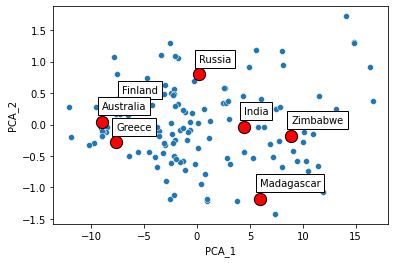

In [310]:
sns.scatterplot(data=data, x='PCA_1', y='PCA_2')

data_several_countries = data.query("Country in ['Finland', 'Zimbabwe', 'Russia', 'Australia', 'Greece', 'India', 'Madagascar']")

plt.scatter(x=data_several_countries['PCA_1'], 
            y=data_several_countries['PCA_2'], 
            color="red", s=150, edgecolors='black')

for _, row in data_several_countries.iterrows():
    plt.annotate(row['Country'], (row['PCA_1'], row['PCA_2'] + 0.20), 
                 backgroundcolor="w", 
                 bbox=dict(facecolor='white', edgecolor='black'))


plt.show()

## График переменных

In [311]:
data_plot = pd.DataFrame(pca_object.components_, columns = pca_object.feature_names_in_)
data_plot

,x1 Logged GDP per capita,x2 Social support,x3 Healthy life expectancy
0,-0.146761,-0.012224,-0.989096
1,0.987172,0.061738,-0.147238
2,0.062865,-0.998018,0.003007


In [313]:
data_plot = pd.DataFrame(pca_object.components_.T, columns = ['PCA_1', 'PCA_2', 'PCA_3'])
data_plot['Feature'] = pca_object.feature_names_in_
data_plot

,PCA_1,PCA_2,PCA_3,Feature
0,-0.146761,0.987172,0.062865,x1 Logged GDP per capita
1,-0.012224,0.061738,-0.998018,x2 Social support
2,-0.989096,-0.147238,0.003007,x3 Healthy life expectancy


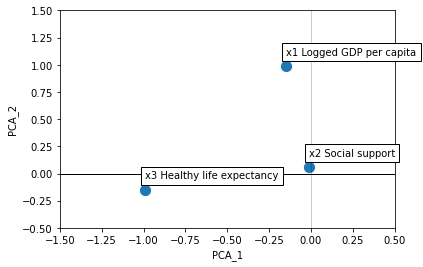

In [314]:
sns.scatterplot(data=data_plot, x='PCA_1', y='PCA_2', s=150)

for _, row in data_plot.iterrows():
    plt.annotate(row['Feature'], (row['PCA_1'], row['PCA_2'] + 0.10), 
                 backgroundcolor="w", 
                 bbox=dict(facecolor='white', edgecolor='black'))
    
sns.lineplot(x=[0, 0], y=[-10,10], color='black', lw=100)
sns.lineplot(x=[-100, 100], y=[0,0], color='black', lw=1)
    
plt.xlim(-1.5, 0.5)
plt.ylim(-0.5, 1.5)

plt.show()

Выводы:
1. `x1 Logged GDP per capita` влияет на PCA_1 отрицательно (слабо), а на PCA_2 положительно (сильно)!
2. `x2 Social Support` никак не влияет на главные компоненты.
3. `x3 Healthy life expectancy` влияет на PCA_1 отрицательно (сильно), а на PCA_2 тоже отрицательно (слабо)

In [361]:
# Чтобы np не выводил массивы через e
np.set_printoptions(suppress=True)

In [394]:
# Собственные значения ковариационной матрицы
pca_object.explained_variance_

array([46.73127242,  0.34458894,  0.00492219])

In [363]:
# = собственное значение / сумма собственных значений
pca_object.explained_variance_ratio_

array([0.99257635, 0.0073191 , 0.00010455])

In [388]:
np.linalg.norm(data['PCA_1'].to_numpy())

83.16386426021566

In [389]:
# Корень из суммы квадраты значений получившихся признаков
# Для PCA_1, PCA_2, PCA_3
pca_object.singular_values_

array([83.16386426,  7.14136985,  0.85351317])

In [393]:
np.linalg.eig(data[FEATURE_NAMES].cov().to_numpy())

(array([46.73127242,  0.34458894,  0.00492219]),
 array([[ 0.14676083,  0.98717235,  0.06286506],
        [ 0.01222441,  0.06173832, -0.99801751],
        [ 0.98909647, -0.14723836,  0.00300684]]))

In [55]:
from sklearn.datasets import load_iris
load_iris = load_iris()

In [72]:
FEATURE_NAMES = [
    'sepal length (cm)', 
    'sepal width (cm)', 
    'petal length (cm)',
    'petal width (cm)']

TARGET_NAME = 'target'

In [62]:
dict_to_replace = {i: value for i, value in enumerate(load_iris.target_names.tolist())}

In [64]:
data = pd.DataFrame(load_iris.data, columns = load_iris.feature_names)
data['target'] = load_iris.target
data['target'] = data['target'].map(dict_to_replace)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [65]:
# data_sepal = data[['sepal length (cm)', 'sepal width (cm)']]
# data_sepal

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

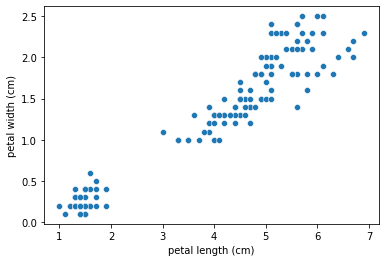

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x='petal length (cm)', y='petal width (cm)')

**Видно, что данные очень хорошо коррелируют**

Мы бы хотели вместо длины и ширины чашелистика использовать какую-нибудь одну величину для обозначения их размера.

Метод гланых компонент может выбирать и нумеровать оси новой системы координат в порядке убывания дисперсии.*
1. В качестве первой оси (первой главной компоненты) выбирается ось, вдоль которой дисперсия данных максимальна. 
2. В качестве второй оси (второй главной компоненты) выбирается ось, дисперсия данных вдоль которой на втором месте по убыванию.
3. ...

$$\sum_{i=1}^{m}\big|\big|x_i - a_1 \cdot (a_1, x_i)\big|\big| ^2 \rightarrow min $$

где:
- $a_1 \cdot (a_1, x_i)$ — проекция вектора $x_i$ на направление $a_{1}$

*<em>[Можно показать](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82), что этот подход построения осей полностью совпадает с построением гиперплоскости (прямой в двумерном пространстве) методом наименьших квадратов (обычной линейной регрессии). </em>

$$D_{вдоль \; a_k} = \frac{1}{m} \sum_{i=1}^{m}(a_k, x_k)^2$$

# PCA

In [73]:
data_train, data_test = train_test_split(data, test_size=0.3)

In [74]:
pca_object = PCA(n_components=2)

In [75]:
pca_object.fit(data_train[FEATURE_NAMES])

PCA(n_components=2)

In [76]:
data_train[['PCA_1', 'PCA_2']] = pca_object.transform(data_train[FEATURE_NAMES])

In [77]:
data_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,PCA_1,PCA_2
63,6.1,2.9,4.7,1.4,versicolor,0.875526,-0.136620
98,5.1,2.5,3.0,1.1,versicolor,-1.027882,-0.724458
115,6.4,3.2,5.3,2.3,virginica,1.800359,0.086984
142,5.8,2.7,5.1,1.9,virginica,1.297877,-0.598652
119,6.0,2.2,5.0,1.5,virginica,1.178407,-0.770293
...,...,...,...,...,...,...,...
25,5.0,3.0,1.6,0.2,setosa,-2.616540,-0.083685
36,5.5,3.5,1.3,0.2,setosa,-2.721129,0.666724
18,5.7,3.8,1.7,0.3,setosa,-2.290060,0.925918
17,5.1,3.5,1.4,0.3,setosa,-2.748819,0.371821


<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

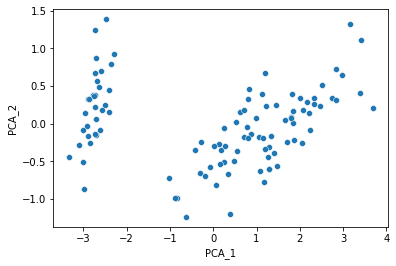

In [78]:
sns.scatterplot(data=data_train, x='PCA_1', y='PCA_2')

In [80]:
pca_object.explained_variance_ratio_

array([0.91792265, 0.0600719 ])

# Цифры

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [11]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

digits = load_digits()
digits.data.shape

(1797, 64)

## PCA

In [8]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [26]:
import pandas as pd
data_for_plot_pca = pd.DataFrame()
data_for_plot_pca[['Component_1', 'Component_2']] = projected
data_for_plot_pca['digit'] = digits.target

https://stackoverflow.com/questions/62884183/trying-to-add-a-colorbar-to-a-seaborn-scatterplot

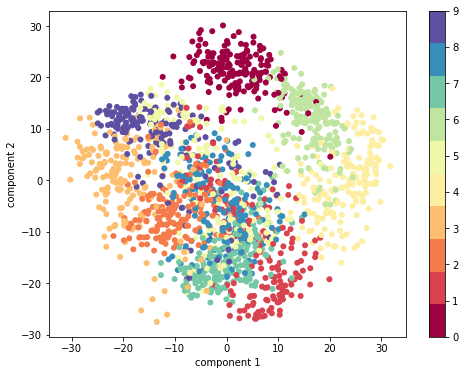

In [60]:
fig = plt.figure(figsize = (8, 6))
plt.scatter(x=projected[:, 0], 
            y=projected[:, 1],
            c=digits.target, 
            edgecolor='none', 
            alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

## TSNE example

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
projects_tsne = tsne.fit_transform(digits.data)

In [63]:
import pandas as pd
data_for_plot_tsne = pd.DataFrame()
data_for_plot_tsne[['Component_1', 'Component_2']] = projects_tsne
data_for_plot_tsne['digit'] = digits.target

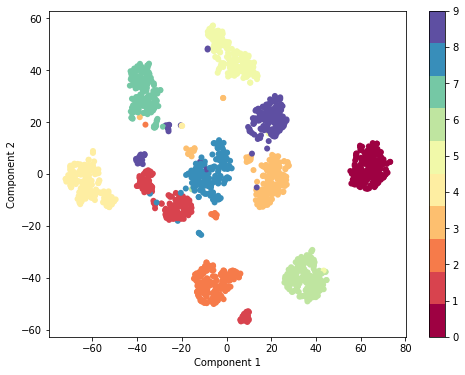

In [65]:
fig = plt.figure(figsize = (8, 6))
plt.scatter(x=data_for_plot_tsne['Component_1'], 
            y=data_for_plot_tsne['Component_2'],
            c=digits.target, 
            edgecolor='none', 
            alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

## Umap

In [1]:
import umap
import umap.umap_ as umap

In [84]:
# !pip install umap
# !pip install umap-learn

In [102]:
# n_neighbors = 50, 
# min_dist=0.0, metric='cosine'
projects_umap = umap.UMAP(
    n_components=2, 
    n_neighbors = 10).fit_transform(digits.data)

In [103]:
data_for_plot_umap = pd.DataFrame()
data_for_plot_umap[['Component_1', 'Component_2']] = projects_umap
data_for_plot_umap['digit'] = digits.target

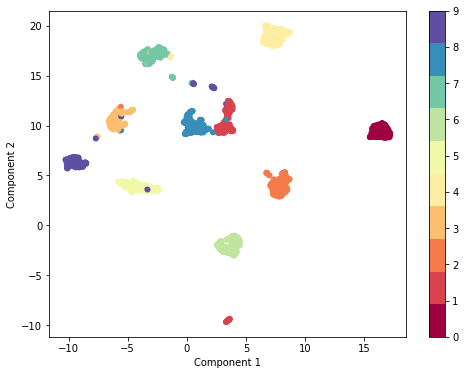

In [104]:
fig = plt.figure(figsize = (8, 6))
plt.scatter(x=data_for_plot_umap['Component_1'], 
            y=data_for_plot_umap['Component_2'],
            c=digits.target, 
            edgecolor='none', 
            alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()